In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from keras.utils import np_utils

In [2]:
dataset = read_csv('../datasets/fashion-mnist-test.csv')
dataset = dataset.values

In [3]:
X, y = dataset[:, 1:]/255, dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 784), (2000, 784), (8000, 10), (2000, 10))

In [12]:
X_train, X_test = X_train.reshape((-1,28,28,1)), X_test.reshape((-1,28,28,1))

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 28, 28, 1), (2000, 28, 28, 1), (8000, 10), (2000, 10))

In [ ]:
# LeNet, AlexNet, VGG-16
# CIFAR

In [10]:
model = Sequential()

# Conv1
model.add(Conv2D(4, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

# Conv2
model.add(Conv2D(8, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
# model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 4)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 8)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
__________

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          batch_size=128,
          epochs=30,
          validation_data=(X_test, y_test)
         )

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 121us/step - loss: 0.8694 - acc: 0.6880 - val_loss: 0.7732 - val_acc: 0.7385
Epoch 2/30
8000/8000 [==============================] - 1s 159us/step - loss: 0.7358 - acc: 0.7366 - val_loss: 0.6833 - val_acc: 0.7565
Epoch 3/30
8000/8000 [==============================] - 1s 134us/step - loss: 0.6536 - acc: 0.7622 - val_loss: 0.6065 - val_acc: 0.7820
Epoch 4/30
8000/8000 [==============================] - 1s 135us/step - loss: 0.6044 - acc: 0.7752 - val_loss: 0.5845 - val_acc: 0.7875
Epoch 5/30
8000/8000 [==============================] - 1s 162us/step - loss: 0.5637 - acc: 0.7933 - val_loss: 0.5539 - val_acc: 0.7965
Epoch 6/30
8000/8000 [==============================] - 1s 130us/step - loss: 0.5336 - acc: 0.8040 - val_loss: 0.5196 - val_acc: 0.7985
Epoch 7/30
8000/8000 [==============================] - 1s 159us/step - loss: 0.5122 - acc: 0.8086 - val_loss: 0.5035 - val_acc: 0.8185


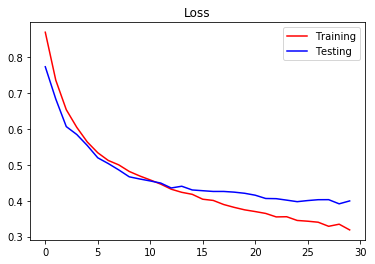

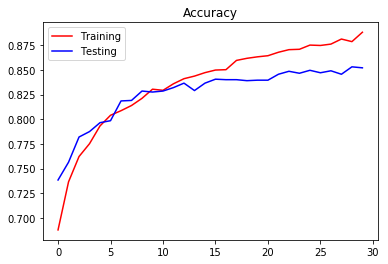

In [20]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()